# NIfTI imaging files with nibabel
* Notebook by Adam Lang
* Date: 5/2/2024
* In this notebook we will work with medical imaging data stored in the NIfTI formats.
    * We will use the **nibabel** python package to analyze and manipulate these file types.
* I wrote this notebook while taking the course Deep Learning with PyTorch for medical image analysis.

## What exactly is "NIfTI"?
* Also known as "Neuromaging Informatics Technology Initiative".
* This is an open file format for storing medical image data.
    * Historically this was used for neuroimaging ---
    * However, NIfTI files are now used to store other medical imaging specialty files not just neuroimaging.

## What is NIfTI used for?
* Stores medical imaging data in an efficient manner with corresponding metadata.
* Main use in research & development environments.
* **Not a clinical standard**

## NIfTI Data Structures
* Header
    * Contains info mostly for image geometry
        * Resolution
        * Position
        * Orientation
    * Significantly less information in a NIfTI header than DICOM files.
* Body
    * **ACTUAL Image pixel data!**
        * 2D
        * 3D
        * 4D
        * etc...
    * Contains the full volume of images so do not have to "piece" them together like DICOM files.
* Overall?
    * "Easier" to utilize and handle than DICOM files
    * File extensions are:
        * ".nii"
        * ".nii-gz" (compressed files)


## Data Science and Machine Learning with NIfTI files
* Python libraries
    * NiBabel
    * SimpleITK
* Image viewer
    * 3D Slicer (www.slicer.org)

* **dicom2nifti**
    * Transforms entire DICOM directory to NIfTI in python.

# Converting DICOM files to NIfTIs
* Using `dicom2nifti`
* Source docs: https://dicom2nifti.readthedocs.io/en/latest/

In [1]:
# install dicom2nifti
!pip install dicom2nifti

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 366.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 18.8 MB/s eta 0:00:00


In [2]:
# import dicom2nifti
import dicom2nifti

In [24]:
ls

 01-DICOM.ipynb
 02-nibabel.ipynb
 03-Preprocessing/
'Data Formats in Medical Imaging - Analysis + Manipulation in Python.ipynb'
 ID_0000_AGE_0060_CONTRAST_1_CT.dcm
 NIfTI_imaging_files_with_nibabel.ipynb
 processed_nifti.nii.gz
 SE000001/


In [26]:
# define path to dicom files
## DO NOT NEED Pathlib with nifti --> define path as string
path_to_dicom = 'SE000001/'

In [27]:
# convert directory dicom to nifti
dicom2nifti.convert_directory(path_to_dicom, ".")

## Nifti data exploration

In [28]:
# imports
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# load compressed nifti file
nifti = nib.load("201_t2w_tse.nii.gz")


In [30]:
print(nifti)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine: 
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal

Summary of nifit header output:
* We can see in contrast to DICOM that the output of the nifti header only contains image geometric info and NO PHI or patient information.

In [31]:
## nifti header + extract specific field
nifti.header["qoffset_x"]

array(115.27232, dtype=float32)

In [32]:
# nifti shape
nifti.shape

(256, 256, 27)

## Some other header metadata functions

In [41]:
# get dtype
print(nifti.header.get_data_dtype())

uint16


In [42]:
# get voxel sizes in mm's
print(nifti.header.get_zooms())

(0.9375, 0.9375, 5.9999995)


In [33]:
# extract nifti image
# similar to pydicom but not accessing pixels array
image_array = nifti.get_fdata()

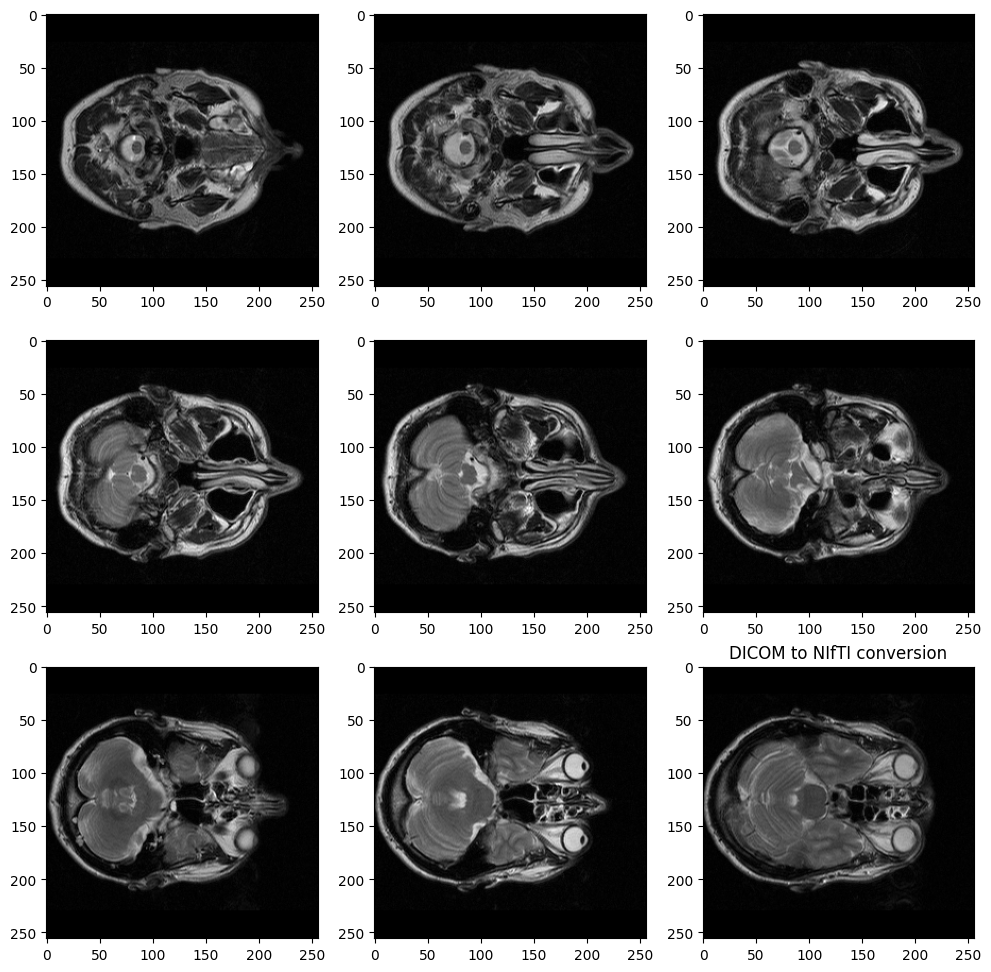

In [34]:
## plot this
fig, axis = plt.subplots(3,3, figsize=(12,12))

# setup slice_counter
slice_counter = 0
## nested for loop iteration through data
for i in range(3):
  for j in range(3):
    # to viz slice --> need col operator to access 1st and 2nd axis
    axis[i][j].imshow(image_array[:,:,slice_counter], cmap="gray")
    slice_counter += 1
plt.title("DICOM to NIfTI conversion")
plt.show();

## Experiment to get center slices of image

In [60]:
# pre-process array
image_array_test = image_array * 10

Text(0.5, 0.98, 'Center slices for image')

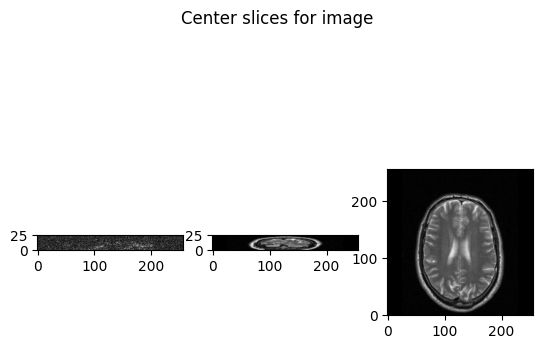

In [61]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = image_array_test[26, :, :]
slice_1 = image_array_test[:, 33, :]
slice_2 = image_array_test[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image")

## Image threshold pre-processing

In [35]:
## image pre-processing step -- set a threshold for the array
image_array_processed = image_array * (image_array > 300)

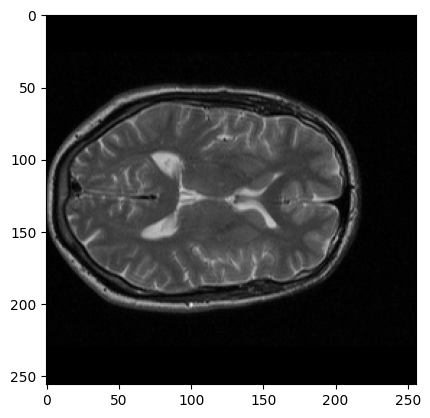

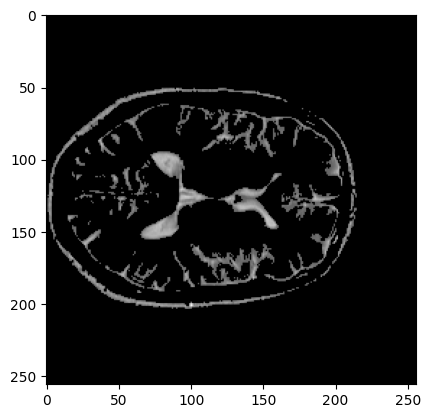

In [36]:
## lets see if this pre-process worked
plt.figure()
# pass 13 image arrays
plt.imshow(image_array[:,:,13], cmap="gray")
plt.figure()
plt.imshow(image_array_processed[:,:,13],cmap="gray")
plt.show();

Result of threshold:
* What stands out here is the brightest areas of the MRI image now using the threshold array or mask.

In [38]:
## to store processed file as nifti --> need to create nifti image
processed_nifti = nib.Nifti1Image(image_array_processed, nifti.affine)


In [39]:
## save processed nibabel nifti file
nib.save(processed_nifti, "201_t2w_tse_processed.nii.gz")

We now saved the processed nifti file via nibabel as a compressed nifti file.